# Playstyle column 

In [1]:
#Import dependencies
import pandas as pd
import os
import numpy as np
import scipy.stats as stats
import re
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [2]:
#Import csv where we cleaned NAs
## 11682 rows 
cleaned_df = pd.read_csv("cleaned_data_js_sc_rg.csv", encoding = "ISO-8859-1")

cleaned_df.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA
2,3.0,42052.03860,Not difficult at all,Other,PC,0.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8.0,17.0,31.0,DEU,DEU
3,4.0,42052.06804,Not difficult at all,Other,PC,20.0,I play for fun,improving,Unranked,5.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0.0,17.0,11.0,USA,USA
4,5.0,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,Unranked,1.0,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14.0,14.0,13.0,KOR,USA


In [3]:
# cleaned_df = cleaned_df.dropna()
# cleaned_df

## drop 11542

In [4]:
#11598 rows 
countries_df=cleaned_df[cleaned_df["Residence_ISO3"].notna()]
countries_df = pd.DataFrame(countries_df)
countries_df

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA
2,3.0,42052.03860,Not difficult at all,Other,PC,0.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8.0,17.0,31.0,DEU,DEU
3,4.0,42052.06804,Not difficult at all,Other,PC,20.0,I play for fun,improving,Unranked,5.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0.0,17.0,11.0,USA,USA
4,5.0,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,Unranked,1.0,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14.0,14.0,13.0,KOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,14247.0,42057.81185,Extremely difficult,League of Legends,PC,20.0,I play for fun,winning,Unranked,20.0,...,High school diploma (or equivalent),USA,USA,Multiplayer,Accept,20.0,23.0,25.0,USA,USA
11679,14248.0,42058.16964,Not difficult at all,Starcraft 2,PC,20.0,I play for fun,having fun,Ranked - Gold,14.0,...,High school diploma (or equivalent),Norway,Norway,Multiplayer,Accept,0.0,32.0,10.0,NOR,NOR
11680,14249.0,42058.24420,Somewhat difficult,Other,"Console (PS, Xbox, ...)",5.0,I play for fun,having fun,Unranked,0.0,...,High school diploma (or equivalent),Canada,Canada,Singleplayer,Accept,13.0,16.0,32.0,CAN,CAN
11681,14250.0,42058.36375,Somewhat difficult,Starcraft 2,PC,15.0,I play for fun,improving,Ranked - Diamond,8.0,...,High school diploma (or equivalent),Canada,Canada,Multiplayer,Accept,2.0,25.0,14.0,CAN,CAN


In [5]:
list_all = countries_df.columns
list_all

Index(['S. No.', 'Timestamp', 'GADE', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
       'Degree', 'Birthplace', 'Residence', 'Playstyle', 'accept', 'GAD_T',
       'SWL_T', 'SPIN_T', 'Residence_ISO3', 'Birthplace_ISO3'],
      dtype='object')

In [6]:
# countries_df2 = pd.DataFrame(countries_df, columns = ['GADE', 'Game', 'Platform', 'earnings', 'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
#        'Degree','Residence', 'Playstyle',])
# print(countries_df)

Is there a relationship between mental health disorder prevalence and different demographics?
- Degree |  hours
- GAD_T | SWL_T | SPIN_T
- Narcissism
- gender | age
- Work | earnings
- whyplay | playstyle
- League | Game
- Platform | streams

# summary satistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = countries_df.groupby('Gender').mean()['GAD_T']
median = countries_df.groupby('Gender').median()['GAD_T']
variance = countries_df.groupby('Gender').var()['GAD_T']
stdev = countries_df.groupby('Gender').std()['GAD_T']
sem = countries_df.groupby('Gender').sem()['GAD_T']

# Assemble the resulting series into a single summary dataframe.
summary_stat1 = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance,
                        "Standard Deviation": stdev, "SEM":sem})
summary_stat1

,Mean,Median,Variance,Standard Deviation,SEM
Gender,,,,,
Female,7.776923,7.0,29.923966,5.470280,0.214562
Male,5.287718,4.0,20.734243,4.553487,0.043595
Other,10.315789,10.0,38.654339,6.217261,1.008573


#### Generalised Anxiety Disorder - GAD

In [8]:
GAD_mean = round(countries_df['GAD_T'].astype('float').mean(), 2)
GAD_median = round(countries_df['GAD_T'].astype('float').median(), 2)
GAD_mode = round(countries_df['GAD_T'].astype('float').mode(), 2)

print(f"GAD Rate Mean: {GAD_mean}")
print(f"GAD Rate Median {GAD_median}")
print(f"GAD Rate mode {GAD_mode}")

GAD Rate Mean: 5.44
GAD Rate Median 4.0
GAD Rate mode 0    2.0
dtype: float64


In [9]:
SWL_mean = round(countries_df['SWL_T'].astype('float').mean(), 2)
SWL_median = round(countries_df['SWL_T'].astype('float').median(), 2)
SWL_mode = round(countries_df['SWL_T'].astype('float').mode(), 2)

print(f"SWL Rate Mean: {SWL_mean}")
print(f"SWL Rate Median {SWL_median}")
print(f"SWL Rate mode {SWL_mode}")

SWL Rate Mean: 19.63
SWL Rate Median 20.0
SWL Rate mode 0    24.0
dtype: float64


## gender 

In [10]:
gender = countries_df.groupby(['S. No.', 'Gender'])
gender_df= pd.DataFrame(gender.size())

count_gender = pd.DataFrame(gender_df.groupby(['Gender']).count())
count_gender.columns = ['Total Count']
count_gender

,Total Count
Gender,
Female,650
Male,10910
Other,38


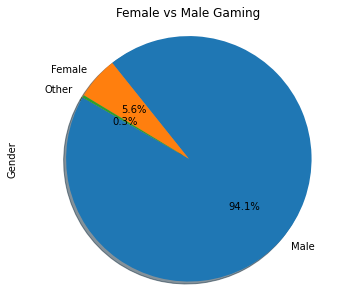

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_gender = countries_df['Gender'].value_counts()

fig1, ax1 = plt.subplots(figsize=(6,5))
pie = count_gender.plot.pie(figsize=(6,5), shadow=True, autopct='%1.1f%%', startangle=150)
plt.title('Female vs Male Gaming')
plt.ylabel('Gender')

plt.axis('equal')
# plt.savefig("Male_vs_Females.png")
plt.show()

In [12]:
countries_df['GADE'].unique()

array(['Not difficult at all', 'Somewhat difficult', 'Very difficult',
       'Extremely difficult', nan], dtype=object)

In [13]:
countries_df['Gender'].value_counts()

Male      10910
Female      650
Other        38
Name: Gender, dtype: int64

# Age

In [14]:
# def group_age(Age):
# # countries_df['Age']
#     if age < 34:
#         return '18-34'
#     elif age < 44:
#         return '35-44'
#     else:
#         return '45-56'

In [15]:
# df_age = pd.DataFrame({'Age': np.random.randint(18, 56, 4)})
# df_age['age_bin'] = pd.cut(x=df_age['Age'], bins=[18, 24, 34, 44, 56])
# df_age

In [16]:
# age_group = pd.DataFrame({'Age':[18,24,34,44,56]})

# bins= [18,24,34,44,56]
# labels = ['Youth','Adult','young adult','middle-age adult']
# age_group['AgeGroup'] = pd.cut(age_group['Age'], bins=bins, labels=labels, right=False)
# print (countries_df)

In [19]:
# create new data_age group by
data_age = countries_df.copy()
countries_df.loc[data_age['Age'].between(18,19), 'age_group'] = 'teenage'
countries_df.loc[data_age['Age'].between(20,24), 'age_group'] = 'y_adult 20-24'
countries_df.loc[data_age['Age'].between(25,39), 'age_group'] = 'adult 25-39'
countries_df.loc[data_age['Age'].between(40,56), 'age_group'] = 'older_adult 40-56'
data_age.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,age_group
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA,adult 25-39
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA,older_adult 40-56
2,3.0,42052.03860,Not difficult at all,Other,PC,0.0,I play for fun,having fun,Unranked,0.0,...,Germany,Germany,Singleplayer,Accept,8.0,17.0,31.0,DEU,DEU,adult 25-39
3,4.0,42052.06804,Not difficult at all,Other,PC,20.0,I play for fun,improving,Unranked,5.0,...,USA,USA,Multiplayer,Accept,0.0,17.0,11.0,USA,USA,adult 25-39
4,5.0,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,Unranked,1.0,...,USA,South Korea,Multiplayer,Accept,14.0,14.0,13.0,KOR,USA,teenage


In [20]:
numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
age_df = data_age.groupby(['age_group']).agg(['count', 'mean', 'sum'])[numeric_columns]
age_df

GAD_T                    SWL_T                      SPIN_T  \
                  count      mean      sum count       mean       sum  count   
age_group                                                                      
adult 25-39        1447  5.011057   7251.0  1447  19.855563   28731.0   1447   
older_adult 40-56    12  4.666667     56.0    12  23.916667     287.0     12   
teenage            4914  5.517501  27113.0  4914  19.961945   98093.0   4914   
y_adult 20-24      5225  5.495885  28716.0  5225  19.247847  100570.0   5225   

                                        
                        mean       sum  
age_group                               
adult 25-39        17.273670   24995.0  
older_adult 40-56  14.500000     174.0  
teenage            21.622304  106252.0  
y_adult 20-24      19.695502  102909.0

age_group
adult 25-39          1447
older_adult 40-56      12
teenage              4914
y_adult 20-24        5225
Name: GAD_T, dtype: int64

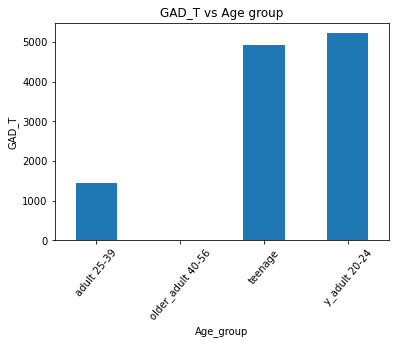

In [21]:
# Generate a bar plot showing the data of GAD_T for agegroup using Pandas.
data_age = data_age.groupby(["age_group"]).count()["GAD_T"]

# plot(kind='bar', figsize=(7,5), align='center', fontsize =8)
data_age.plot(kind='bar', legend=False, rot=50, align='center')
plt.title('GAD_T vs Age group')
plt.ylabel('GAD_T')
plt.xlabel('Age_group')
# plt.savefig('Bar_chart1')
plt.tight_layout
data_age

R squared: nan


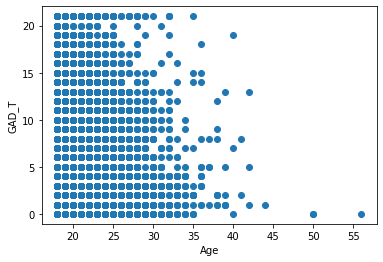

In [22]:
#  correlation
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = countries_df['Age'].astype('float')
y_values = countries_df['GAD_T'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Age')
plt.ylabel('GAD_T')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

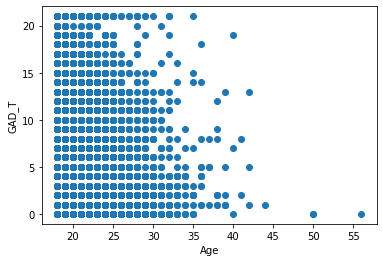

In [23]:
avg_gender = countries_df.loc[countries_df['Gender'] == 'Male', :]
maleavg= avg_gender.groupby('Gender').mean()
plt.scatter(avg_gender['Age'], avg_gender['GAD_T'])
plt.xlabel('Age')
plt.ylabel('GAD_T')
plt.savefig('scatterplot')
plt.show()

# GENDER

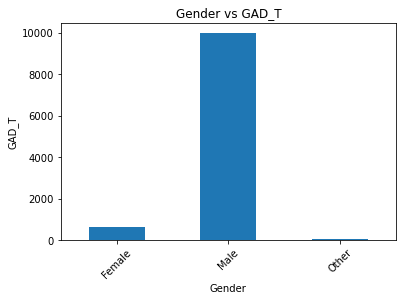

<Figure size 432x288 with 0 Axes>

In [24]:
# Filter data so it only includes gender type has GAD_T
countries_df = pd.DataFrame(countries_df.loc[countries_df['GAD_T']>0,:])


# Split up our data into groups based upon Gender
gender_group = countries_df.groupby('Gender')

# Find out gender type has GAD
GAD_count = gender_group['GAD_T'].count()

# Chart our data, give it a title, and label the axes
chart = GAD_count.plot(kind="bar", title="Gender vs GAD_T", rot=45)
chart.set_xlabel("Gender")
chart.set_ylabel("GAD_T")

plt.show()
plt.tight_layout()

# Employment

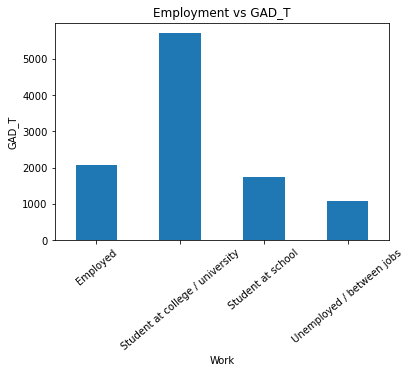

<Figure size 432x288 with 0 Axes>

In [25]:
# Filter data so it only includes patrons who checked out at least one item
countries_df = pd.DataFrame(countries_df.loc[countries_df['GAD_T']>0,:])

# Split up our data into groups based upon 'Patron Type Definition'
gender_group = countries_df.groupby('Work')

# Find out how many of each patron type borrowed library items
GAD_count = gender_group['GAD_T'].count()

# Chart our data, give it a title, and label the axes
chart = GAD_count.plot(kind="bar", title="Employment vs GAD_T", rot=40)
chart.set_xlabel("Work")
chart.set_ylabel("GAD_T")

plt.show()
plt.tight_layout()

# Degree/ education

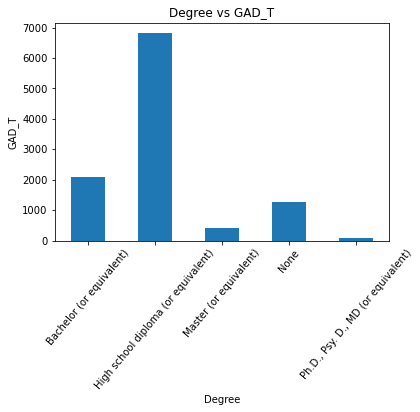

<Figure size 432x288 with 0 Axes>

In [26]:
# Filter data so it only includes patrons who checked out at least one item
countries_df = pd.DataFrame(countries_df.loc[countries_df['GAD_T']>0,:])

# Split up our data into groups based upon 'Patron Type Definition'
gender_group = countries_df.groupby('Degree')

# Find out how many of each patron type borrowed library items
GAD_count = gender_group['GAD_T'].count()

# Chart our data, give it a title, and label the axes
chart = GAD_count.plot(kind="bar", title="Degree vs GAD_T", rot=50)
chart.set_xlabel("Degree")
chart.set_ylabel("GAD_T")

plt.show()
plt.tight_layout()

# USA

In [27]:
resident_df = countries_df['Residence'].value_counts()
resident_df

USA            3649
Germany        1142
UK              816
Canada          797
Netherlands     401
               ... 
Grenada           1
Cyprus            1
Indonesia         1
Jamaica           1
Palestine         1
Name: Residence, Length: 105, dtype: int64

In [28]:
work_df = countries_df['Work'].unique()
work_df

array(['Unemployed / between jobs', 'Employed',
       'Student at college / university', 'Student at school'],
      dtype=object)

In [29]:
work_df = countries_df['Work'].value_counts()
work_df

Student at college / university    5708
Employed                           2085
Student at school                  1746
Unemployed / between jobs          1097
Name: Work, dtype: int64

In [30]:
# create new file - Filter data to national settlements
USA_set = countries_df.loc[countries_df["Residence"]=="USA",:]
USA_set

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,age_group
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA,adult 25-39
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA,older_adult 40-56
5,6.0,42052.13119,Not difficult at all,Other,"Console (PS, Xbox, ...)",4.0,I play for fun,relaxing,Unranked,0.0,...,USA,USA,Multiplayer,Accept,1.0,17.0,13.0,USA,USA,y_adult 20-24
7,9.0,42052.19737,Very difficult,Other,"Console (PS, Xbox, ...)",2.0,I play for fun,winning,Unranked,0.0,...,USA,USA,Multiplayer,Accept,12.0,12.0,55.0,USA,USA,y_adult 20-24
9,11.0,42052.24204,Somewhat difficult,Other,PC,14.0,I play for fun,having fun,Unranked,0.0,...,USA,USA,Singleplayer,Accept,19.0,27.0,6.0,USA,USA,y_adult 20-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,14231.0,42056.37289,Somewhat difficult,Other,PC,21.0,I play for fun,having fun,Unranked,0.0,...,USA,USA,Multiplayer,Accept,11.0,28.0,13.0,USA,USA,teenage
11670,14237.0,42056.67219,Not difficult at all,League of Legends,PC,20.0,I play for fun,winning,Ranked - Gold,1.0,...,USA,USA,Multiplayer,Accept,2.0,27.0,33.0,USA,USA,teenage
11671,14238.0,42056.81326,Somewhat difficult,League of Legends,PC,10.0,I play for fun,having fun,Ranked - Silver,1.0,...,USA,USA,Multiplayer,Accept,2.0,17.0,23.0,USA,USA,adult 25-39
11676,14245.0,42057.35267,Not difficult at all,League of Legends,PC,30.0,I play for fun,having fun,Ranked - Silver,10.0,...,USA,USA,Multiplayer,Accept,6.0,16.0,12.0,USA,USA,y_adult 20-24


In [31]:
work_count_USA = USA_set['Work'].value_counts()
work_count_USA

Student at college / university    1912
Employed                            864
Student at school                   571
Unemployed / between jobs           302
Name: Work, dtype: int64

In [32]:
# Create new dataframe for data to chart
compare_employment = pd.DataFrame({"USA Employment": work_count_USA,
                                       "All National_employment": work_df})
compare_employment

,USA Employment,All National_employment
Student at college / university,1912,5708
Employed,864,2085
Student at school,571,1746
Unemployed / between jobs,302,1097


In [33]:
# Fill NA
compare_employment = compare_employment.fillna(0)
compare_employment

,USA Employment,All National_employment
Student at college / university,1912,5708
Employed,864,2085
Student at school,571,1746
Unemployed / between jobs,302,1097


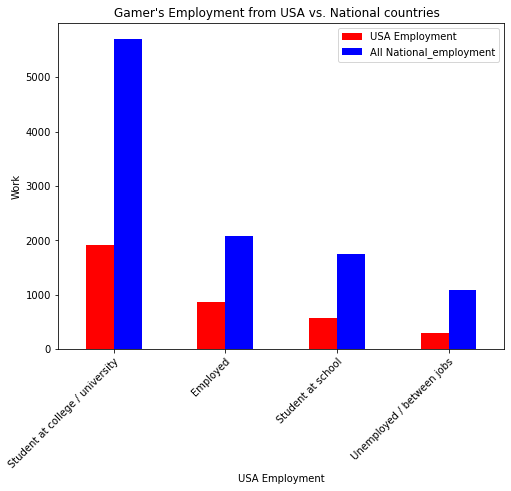

In [34]:
# Configure plot, figsize, title, and axis labels
figure1 = compare_employment.plot(kind="bar", color=["red", "blue"], figsize=(8,6),
                                   title="Gamer's Employment from USA vs. National countries  ",
                                   xlabel="USA Employment",
                                   ylabel="Work")

# Configure x-tick rotation
xticklabels = compare_employment.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()